# <span style="color:orange">Importing and Preprocessing the Data</span>

### <span style="color:orange">Importing the Libraries</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time

### <span style="color:orange">Importing the Dataset</span>

In [2]:
dataset = pd.read_csv('Dataset\\Breast_Cancer.csv')

In [3]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
print(dataset)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1        

#### <span style="color:orange">Changing the class col for the ROC curve</span>

In [5]:
# Define a function to modify values
def modify_class_id(class_id):
    if class_id == 2:
        class_id = 0
    elif class_id == 4:
        class_id = 1
    return class_id

# Apply the function to column 'A'
dataset['Class'] = dataset['Class'].apply(modify_class_id)

dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [6]:
input_features = dataset.iloc[ : , :-1].values
dv = dataset.iloc[ : , -1].values

In [7]:
print(input_features)

[[1000025       5       1 ...       3       1       1]
 [1002945       5       4 ...       3       2       1]
 [1015425       3       1 ...       3       1       1]
 ...
 [ 888820       5      10 ...       8      10       2]
 [ 897471       4       8 ...      10       6       1]
 [ 897471       4       8 ...      10       4       1]]


In [8]:
print(dv)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

### <span style="color:orange">Splitting the Data</span>

In [9]:
from sklearn.model_selection import train_test_split

(input_features_train, input_features_test,
dv_train, dv_test) = train_test_split(input_features, dv, test_size=0.2, random_state=0)

In [10]:
print(input_features_train)

[[ 752904      10       1 ...       5       4       1]
 [1218860       1       1 ...       3       1       1]
 [ 411453       5       1 ...       3       1       1]
 ...
 [1214092       1       1 ...       1       1       1]
 [1303489       3       1 ...       2       1       1]
 [ 378275      10       9 ...       7       7       1]]


### <span style="color:orange">Feature Scaling</span>

##### <span style="color:orange">Standardization</span>

In [11]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

In [12]:
## X-train
input_features_train = standard_scaler.fit_transform(input_features_train)

## X-test transform only
input_features_test = standard_scaler.transform(input_features_test)

In [13]:
print(input_features_train)

[[-0.49838781  1.98839518 -0.69781134 ...  0.61907387  0.34532102
  -0.33863738]
 [ 0.19242611 -1.22468404 -0.69781134 ... -0.18860673 -0.62157783
  -0.33863738]
 [-1.00461394  0.20335117 -0.69781134 ... -0.18860673 -0.62157783
  -0.33863738]
 ...
 [ 0.1853572  -1.22468404 -0.69781134 ... -0.99628733 -0.62157783
  -0.33863738]
 [ 0.3178948  -0.51066644 -0.69781134 ... -0.59244703 -0.62157783
  -0.33863738]
 [-1.05380275  1.98839518  1.90512627 ...  1.42675446  1.31221987
  -0.33863738]]


# <span style="color:orange">1. Logistic Regression Model</span>

### <span style="color:orange">Training the Logistic Regression Model on the Training set</span>

In [14]:
LR_start = time()

from sklearn.linear_model import LogisticRegression

## Building the Model
logistic_R_classifier = LogisticRegression(random_state=0)
## Training the Model
logistic_R_classifier.fit(X=input_features_train, y=dv_train)

LogisticRegression(random_state=0)

### <span style="color:orange">Predicting the Test Set Results</span>

In [15]:
dv_predicted_LR = logistic_R_classifier.predict(input_features_test)

LR_finish = time()

In [16]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_LR.reshape(len(dv_predicted_LR), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )
# // [dv_predicted dv_test]

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [17]:
dv_pred_prob_LR = logistic_R_classifier.predict_proba(input_features_test)

print(dv_pred_prob_LR)

[[9.93e-01 7.33e-03]
 [9.94e-01 5.93e-03]
 [9.25e-02 9.08e-01]
 [1.94e-02 9.81e-01]
 [9.98e-01 1.95e-03]
 [9.96e-01 4.48e-03]
 [9.81e-01 1.93e-02]
 [3.51e-04 1.00e+00]
 [9.95e-01 4.68e-03]
 [9.97e-01 3.13e-03]
 [7.71e-04 9.99e-01]
 [9.83e-01 1.67e-02]
 [1.84e-05 1.00e+00]
 [9.94e-01 6.07e-03]
 [9.65e-01 3.45e-02]
 [5.78e-01 4.22e-01]
 [5.68e-03 9.94e-01]
 [1.85e-03 9.98e-01]
 [2.09e-04 1.00e+00]
 [9.80e-01 1.96e-02]
 [9.94e-01 5.85e-03]
 [9.89e-01 1.12e-02]
 [4.25e-01 5.75e-01]
 [9.96e-01 3.87e-03]
 [3.77e-03 9.96e-01]
 [4.15e-03 9.96e-01]
 [9.90e-01 1.03e-02]
 [9.93e-01 7.27e-03]
 [9.91e-01 8.75e-03]
 [2.90e-03 9.97e-01]
 [9.98e-01 1.74e-03]
 [2.06e-04 1.00e+00]
 [1.45e-05 1.00e+00]
 [9.91e-01 8.70e-03]
 [9.94e-01 5.93e-03]
 [9.91e-01 8.70e-03]
 [6.02e-03 9.94e-01]
 [2.97e-02 9.70e-01]
 [9.94e-01 6.07e-03]
 [1.27e-03 9.99e-01]
 [9.82e-01 1.79e-02]
 [9.57e-01 4.30e-02]
 [9.96e-01 4.12e-03]
 [9.97e-01 3.12e-03]
 [9.98e-01 1.73e-03]
 [9.92e-01 7.79e-03]
 [9.97e-01 2.82e-03]
 [3.33e-04 1.

### <span style="color:orange">**ROC curve For Logistic Regression Model</span>

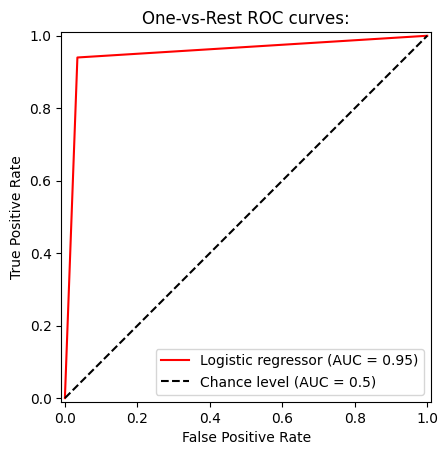

In [18]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_LR,
                                           name="Logistic regressor", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

**AUC: Area Under Curve (0-1)**

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_LR = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_LR)
print(confusion_matrix_score_LR)

[[84  3]
 [ 3 47]]


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score_LR = accuracy_score(y_true=dv_test, y_pred=dv_predicted_LR)
print(accuracy_score_LR)

0.9562043795620438


In [21]:
from sklearn.metrics import precision_score

precision_score_LR = precision_score(y_true=dv_test, y_pred=dv_predicted_LR)
print(precision_score_LR)

0.94


In [22]:
from sklearn.metrics import recall_score

recall_score_LR = recall_score(y_true=dv_test, y_pred=dv_predicted_LR)
print(recall_score_LR)

0.94


In [23]:
from sklearn.metrics import f1_score

f1_score_LR = f1_score(y_true=dv_test, y_pred=dv_predicted_LR)
print(f1_score_LR)

0.94


___

# <span style="color:orange">2. K-Nearest Neighbors Model</span>

### <span style="color:orange">Training the K-NN Model on the Training set</span>

In [24]:
KNN_start = time()

from sklearn.neighbors import KNeighborsClassifier

## Building the Model
k_nn_classifier = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto",
                                       metric="minkowski", p=2)
## Training the Model
k_nn_classifier.fit(X=input_features_train, y=dv_train)

KNeighborsClassifier()

### <span style="color:orange">Predicting the Test Set Results</span>

In [25]:
dv_predicted_KNN = k_nn_classifier.predict(input_features_test)

KNN_finish = time()

In [26]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_KNN.reshape(len(dv_predicted_KNN), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )
# // [dv_predicted dv_test]

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [27]:
dv_pred_prob_KNN = k_nn_classifier.predict_proba(input_features_test)

print(dv_pred_prob_KNN)

[[1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]

### <span style="color:orange">**ROC curve For KNN Model</span>

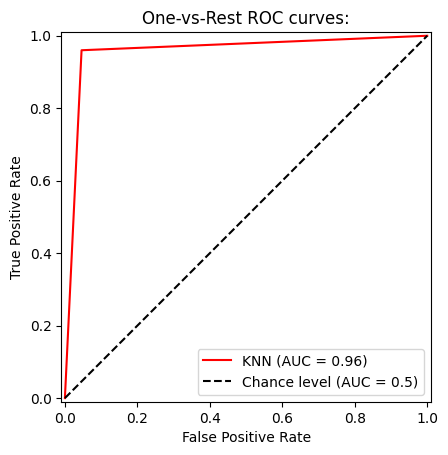

In [28]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_KNN,
                                           name="KNN", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

**AUC: Area Under Curve (0-1)**

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_KNN = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_KNN)
print(confusion_matrix_score_KNN)

[[83  4]
 [ 2 48]]


In [30]:
from sklearn.metrics import accuracy_score

accuracy_score_KNN = accuracy_score(y_true=dv_test, y_pred=dv_predicted_KNN)
print(accuracy_score_KNN)

0.9562043795620438


In [31]:
from sklearn.metrics import precision_score

precision_score_KNN = precision_score(y_true=dv_test, y_pred=dv_predicted_KNN)
print(precision_score_KNN)

0.9230769230769231


In [32]:
from sklearn.metrics import recall_score

recall_score_KNN = recall_score(y_true=dv_test, y_pred=dv_predicted_KNN)
print(recall_score_KNN)

0.96


In [33]:
from sklearn.metrics import f1_score

f1_score_KNN = f1_score(y_true=dv_test, y_pred=dv_predicted_KNN)
print(f1_score_KNN)

0.9411764705882353


___

# <span style="color:orange">3. Support Vector Machine Model (Linear)</span>

### <span style="color:orange">Training the SVM Model on the Training set</span>

In [34]:
SVM_lin_start = time()

from sklearn.svm import SVC

## Building the Model
sv_classifier = SVC(kernel='linear', random_state=0, probability=True)
## Training the Model
sv_classifier.fit(X=input_features_train, y=dv_train)

SVC(kernel='linear', probability=True, random_state=0)

### <span style="color:orange">Predicting the Test Set Results</span>

In [35]:
dv_predicted_SVM = sv_classifier.predict(input_features_test)

SVM_lin_finish = time()

In [36]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_SVM.reshape(len(dv_predicted_SVM), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [37]:
dv_pred_prob_SVM= sv_classifier.predict_proba(input_features_test)

print(dv_pred_prob_SVM)

[[9.89e-01 1.13e-02]
 [9.90e-01 9.72e-03]
 [1.08e-01 8.92e-01]
 [2.51e-02 9.75e-01]
 [9.96e-01 4.18e-03]
 [9.93e-01 7.03e-03]
 [9.78e-01 2.23e-02]
 [4.61e-08 1.00e+00]
 [9.93e-01 7.05e-03]
 [9.94e-01 6.09e-03]
 [3.30e-06 1.00e+00]
 [9.78e-01 2.18e-02]
 [4.55e-10 1.00e+00]
 [9.90e-01 9.95e-03]
 [9.53e-01 4.72e-02]
 [5.00e-01 5.00e-01]
 [3.45e-03 9.97e-01]
 [3.61e-06 1.00e+00]
 [3.90e-07 1.00e+00]
 [9.64e-01 3.64e-02]
 [9.90e-01 9.61e-03]
 [9.84e-01 1.61e-02]
 [3.18e-01 6.82e-01]
 [9.93e-01 6.96e-03]
 [7.28e-03 9.93e-01]
 [8.17e-03 9.92e-01]
 [9.86e-01 1.36e-02]
 [9.71e-01 2.95e-02]
 [9.87e-01 1.32e-02]
 [1.55e-05 1.00e+00]
 [9.96e-01 3.74e-03]
 [1.43e-07 1.00e+00]
 [1.05e-09 1.00e+00]
 [9.87e-01 1.30e-02]
 [9.90e-01 9.75e-03]
 [9.87e-01 1.30e-02]
 [7.31e-03 9.93e-01]
 [6.89e-02 9.31e-01]
 [9.90e-01 9.98e-03]
 [8.56e-06 1.00e+00]
 [9.77e-01 2.28e-02]
 [9.54e-01 4.64e-02]
 [9.90e-01 1.02e-02]
 [9.95e-01 5.06e-03]
 [9.96e-01 3.72e-03]
 [9.86e-01 1.42e-02]
 [9.93e-01 6.52e-03]
 [6.66e-06 1.

### <span style="color:orange">**ROC curve For SVM Model</span>

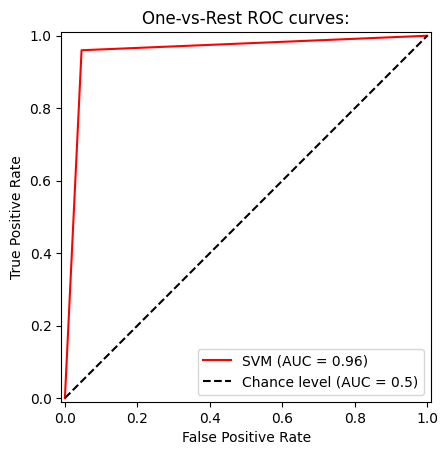

In [38]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_SVM,
                                           name="SVM", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_SVM = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_SVM)
print(confusion_matrix_score_SVM)

[[83  4]
 [ 2 48]]


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score_SVM = accuracy_score(y_true=dv_test, y_pred=dv_predicted_SVM)
print(accuracy_score_SVM)

0.9562043795620438


In [41]:
from sklearn.metrics import precision_score

precision_score_SVM = precision_score(y_true=dv_test, y_pred=dv_predicted_SVM)
print(precision_score_SVM)

0.9230769230769231


In [42]:
from sklearn.metrics import recall_score

recall_score_SVM = recall_score(y_true=dv_test, y_pred=dv_predicted_SVM)
print(recall_score_SVM)

0.96


In [43]:
from sklearn.metrics import f1_score

f1_score_SVM = f1_score(y_true=dv_test, y_pred=dv_predicted_SVM)
print(f1_score_SVM)

0.9411764705882353


___

# <span style="color:orange">4. Support Vector Machine Model (non-Linear)</span>

### <span style="color:orange">Training the RBF SVM Model on the Training set</span>

In [44]:
SVM_rbf_start = time()

from sklearn.svm import SVC

## Building the Model
sv_rbf_classifier = SVC(kernel='rbf', random_state=0, probability=True)
## Training the Model
sv_rbf_classifier.fit(X=input_features_train, y=dv_train)

SVC(probability=True, random_state=0)

**probability=True, so that I can use predict.proba()**

### <span style="color:orange">Predicting the Test Set Results</span>

In [45]:
dv_predicted_SVM_rbf = sv_rbf_classifier.predict(input_features_test)

SVM_rbf_finish = time()

In [46]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_SVM_rbf.reshape(len(dv_predicted_SVM_rbf), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )
# // [dv_predicted dv_test]

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [47]:
dv_pred_prob_SVM_rbf = sv_rbf_classifier.predict_proba(input_features_test)

print(dv_pred_prob_SVM_rbf)

[[0.98 0.02]
 [1.   0.  ]
 [0.04 0.96]
 [0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.03 0.97]
 [0.99 0.01]
 [1.   0.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.05 0.95]
 [1.   0.  ]
 [0.97 0.03]
 [0.27 0.73]
 [0.02 0.98]
 [0.04 0.96]
 [0.04 0.96]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.1  0.9 ]
 [1.   0.  ]
 [0.01 0.99]
 [0.02 0.98]
 [0.99 0.01]
 [0.99 0.01]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.08 0.92]
 [0.04 0.96]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.02 0.98]
 [0.03 0.97]
 [1.   0.  ]
 [0.03 0.97]
 [0.99 0.01]
 [0.95 0.05]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.99 0.01]
 [0.03 0.97]
 [0.99 0.01]
 [0.99 0.01]
 [0.03 0.97]
 [0.99 0.01]
 [0.02 0.98]
 [0.99 0.01]
 [0.99 0.01]
 [0.98 0.02]
 [0.06 0.94]
 [0.03 0.97]
 [0.98 0.02]
 [0.04 0.96]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]
 [0.12 0.88]
 [0.99 0.01]
 [0.99 0.01]
 [1.   0.  ]
 [0.99 0.01]
 [0.98 0.02]
 [1.   0.  ]
 [0.01 0.99]

### <span style="color:orange">**ROC curve For SVM Model</span>

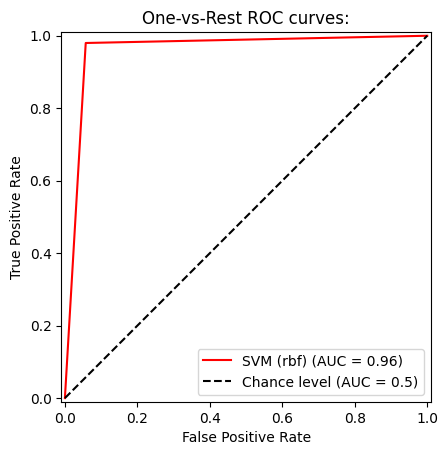

In [48]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_SVM_rbf,
                                           name="SVM (rbf)", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

**AUC: Area Under Curve (0-1)**

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_SVM_rbf = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_SVM_rbf)
print(confusion_matrix_score_SVM_rbf)

[[82  5]
 [ 1 49]]


In [50]:
from sklearn.metrics import accuracy_score

accuracy_score_SVM_rbf = accuracy_score(y_true=dv_test, y_pred=dv_predicted_SVM_rbf)
print(accuracy_score_SVM_rbf)

0.9562043795620438


In [51]:
from sklearn.metrics import precision_score

precision_score_SVM_rbf = precision_score(y_true=dv_test, y_pred=dv_predicted_SVM_rbf)
print(precision_score_SVM_rbf)

0.9074074074074074


In [52]:
from sklearn.metrics import recall_score

recall_score_SVM_rbf = recall_score(y_true=dv_test, y_pred=dv_predicted_SVM_rbf)
print(recall_score_SVM_rbf)

0.98


In [53]:
from sklearn.metrics import f1_score

f1_score_SVM_rbf = f1_score(y_true=dv_test, y_pred=dv_predicted_SVM_rbf)
print(f1_score_SVM_rbf)

0.9423076923076923


___

# <span style="color:orange">5. Naive Bayes Model</span>

### <span style="color:orange">Training the Naive Bayes Model on the Training set</span>

In [54]:
NB_start = time()

from sklearn.naive_bayes import GaussianNB

## Building the Model
naive_bayes_classifier = GaussianNB()
## Training the Model
naive_bayes_classifier.fit(X=input_features_train, y=dv_train)

GaussianNB()

### <span style="color:orange">Predicting the Test Set Results</span>

In [55]:
dv_predicted_NB = naive_bayes_classifier.predict(input_features_test)

NB_finish = time()

In [56]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_NB.reshape(len(dv_predicted_NB), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )
# // [dv_predicted dv_test]

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [57]:
dv_pred_prob_NB = naive_bayes_classifier.predict_proba(input_features_test)

print(dv_pred_prob_NB)

[[1.00e+000 7.52e-008]
 [1.00e+000 2.75e-010]
 [1.53e-020 1.00e+000]
 [3.07e-037 1.00e+000]
 [1.00e+000 5.35e-011]
 [1.00e+000 2.99e-009]
 [1.00e+000 5.85e-008]
 [3.02e-108 1.00e+000]
 [1.00e+000 1.08e-008]
 [1.00e+000 1.54e-011]
 [2.92e-062 1.00e+000]
 [1.00e+000 3.46e-009]
 [1.45e-122 1.00e+000]
 [1.00e+000 3.07e-010]
 [9.96e-001 3.89e-003]
 [4.12e-025 1.00e+000]
 [1.09e-061 1.00e+000]
 [1.03e-069 1.00e+000]
 [2.63e-072 1.00e+000]
 [1.00e+000 2.12e-008]
 [1.00e+000 2.49e-010]
 [1.00e+000 1.13e-009]
 [1.05e-014 1.00e+000]
 [1.00e+000 1.44e-010]
 [1.60e-028 1.00e+000]
 [1.33e-037 1.00e+000]
 [1.00e+000 2.22e-008]
 [6.79e-003 9.93e-001]
 [1.00e+000 8.95e-010]
 [7.90e-044 1.00e+000]
 [1.00e+000 6.01e-011]
 [5.79e-102 1.00e+000]
 [7.79e-119 1.00e+000]
 [1.00e+000 6.92e-010]
 [1.00e+000 4.03e-010]
 [1.00e+000 6.92e-010]
 [1.18e-048 1.00e+000]
 [1.11e-021 1.00e+000]
 [1.00e+000 4.79e-010]
 [6.21e-068 1.00e+000]
 [1.00e+000 6.52e-009]
 [1.00e+000 6.83e-007]
 [1.00e+000 2.89e-009]
 [1.00e+000

### <span style="color:orange">**ROC curve For Naive Bayes Model</span>

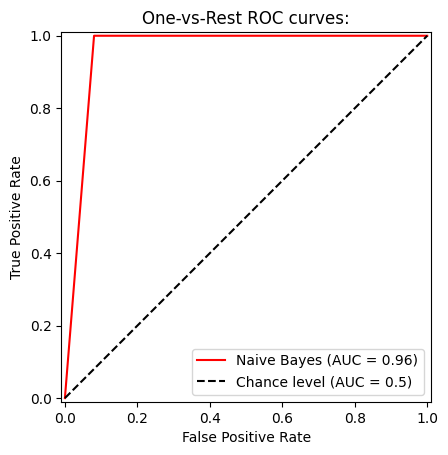

In [58]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_NB,
                                           name="Naive Bayes", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

**AUC: Area Under Curve (0-1)**

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_NB = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_NB)
print(confusion_matrix_score_NB)

[[80  7]
 [ 0 50]]


In [60]:
from sklearn.metrics import accuracy_score

accuracy_score_NB = accuracy_score(y_true=dv_test, y_pred=dv_predicted_NB)
print(accuracy_score_NB)

0.948905109489051


In [61]:
from sklearn.metrics import precision_score

precision_score_NB = precision_score(y_true=dv_test, y_pred=dv_predicted_NB)
print(precision_score_NB)

0.8771929824561403


In [62]:
from sklearn.metrics import recall_score

recall_score_NB = recall_score(y_true=dv_test, y_pred=dv_predicted_NB)
print(recall_score_NB)

1.0


In [63]:
from sklearn.metrics import f1_score

f1_score_NB = f1_score(y_true=dv_test, y_pred=dv_predicted_NB)
print(f1_score_NB)

0.9345794392523364


___

# <span style="color:orange">6. Decision Tree Model</span>

### <span style="color:orange">Training the Decision Tree Model on the Training set</span>

In [64]:
DT_start = time()

from sklearn.tree import DecisionTreeClassifier

## Building the Model
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
## Training the Model
decision_tree_classifier.fit(X=input_features_train, y=dv_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### <span style="color:orange">Predicting the Test Set Results</span>

In [65]:
dv_predicted_DT = decision_tree_classifier.predict(input_features_test)

DT_finish = time()

In [66]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_DT.reshape(len(dv_predicted_DT), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )
# // [dv_predicted dv_test]

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [67]:
dv_pred_prob_DT = decision_tree_classifier.predict_proba(input_features_test)

print(dv_pred_prob_DT)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

### <span style="color:orange">**ROC curve For Decision Tree Model</span>

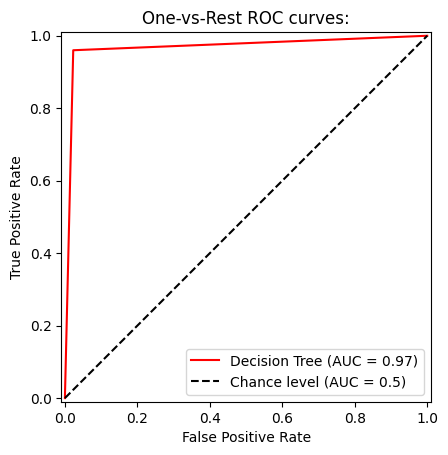

In [68]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_DT,
                                           name="Decision Tree", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

**AUC: Area Under Curve (0-1)**

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_DT = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_DT)
print(confusion_matrix_score_DT)

[[85  2]
 [ 2 48]]


In [70]:
from sklearn.metrics import accuracy_score

accuracy_score_DT = accuracy_score(y_true=dv_test, y_pred=dv_predicted_DT)
print(accuracy_score_DT)

0.9708029197080292


In [71]:
from sklearn.metrics import precision_score

precision_score_DT = precision_score(y_true=dv_test, y_pred=dv_predicted_DT)
print(precision_score_DT)

0.96


In [72]:
from sklearn.metrics import recall_score

recall_score_DT = recall_score(y_true=dv_test, y_pred=dv_predicted_DT)
print(recall_score_DT)

0.96


In [73]:
from sklearn.metrics import f1_score

f1_score_DT = f1_score(y_true=dv_test, y_pred=dv_predicted_DT)
print(f1_score_DT)

0.96


___

# <span style="color:orange">7. Random Forest Model</span>

### <span style="color:orange">Training the Random Forest Model on the Training set</span>

In [74]:
RF_start = time()

from sklearn.ensemble import RandomForestClassifier

## Building the Model
random_F_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', bootstrap=True,
                                                    max_depth=10, max_features='sqrt', min_samples_leaf=8,
                                                    min_samples_split=2, random_state = 0)
## Training the Model
random_F_classifier.fit(X=input_features_train, y=dv_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       n_estimators=10, random_state=0)

### <span style="color:orange">Predicting the Test Set Results</span>

In [75]:
dv_predicted_RF = random_F_classifier.predict(input_features_test)

RF_finish = time()

In [76]:
np.set_printoptions(precision=2)

print(np.concatenate((dv_predicted_RF.reshape(len(dv_predicted_RF), 1),
                      dv_test.reshape(len(dv_test), 1) ), axis=1) )
# // [dv_predicted dv_test]

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [77]:
dv_pred_prob_RF = random_F_classifier.predict_proba(input_features_test)

print(dv_pred_prob_RF)

[[0.94 0.06]
 [1.   0.  ]
 [0.11 0.89]
 [0.07 0.93]
 [1.   0.  ]
 [0.95 0.05]
 [0.94 0.06]
 [0.04 0.96]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.95 0.05]
 [0.51 0.49]
 [0.14 0.86]
 [0.02 0.98]
 [0.01 0.99]
 [0.96 0.04]
 [1.   0.  ]
 [0.99 0.01]
 [0.17 0.83]
 [1.   0.  ]
 [0.05 0.95]
 [0.06 0.94]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.14 0.86]
 [1.   0.  ]
 [0.1  0.9 ]
 [0.79 0.21]
 [0.74 0.26]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.05 0.95]
 [1.   0.  ]
 [0.12 0.88]
 [0.99 0.01]
 [1.   0.  ]
 [0.94 0.06]
 [0.1  0.9 ]
 [0.23 0.77]
 [0.93 0.07]
 [0.03 0.97]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [0.28 0.72]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.89 0.11]
 [1.   0.  ]
 [0.   1.  ]

### <span style="color:orange">**ROC curve For Random Forest Model</span>

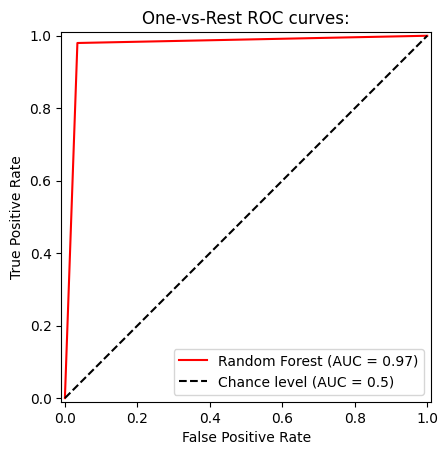

In [78]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true=dv_test, y_pred=dv_predicted_RF,
                                           name="Random Forest", color="red", plot_chance_level=True)
# // color="darkorange"

_ = display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                    title="One-vs-Rest ROC curves:")

**AUC: Area Under Curve (0-1)**

### <span style="color:orange">**Making the Confusion Matrix and getting the Evaluation scores</span>

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix_score_RF = confusion_matrix(y_true=dv_test, y_pred=dv_predicted_RF)
print(confusion_matrix_score_RF)

[[84  3]
 [ 1 49]]


In [80]:
from sklearn.metrics import accuracy_score

accuracy_score_RF = accuracy_score(y_true=dv_test, y_pred=dv_predicted_RF)
print(accuracy_score_RF)

0.9708029197080292


In [81]:
from sklearn.metrics import precision_score

precision_score_RF = precision_score(y_true=dv_test, y_pred=dv_predicted_RF)
print(precision_score_RF)

0.9423076923076923


In [82]:
from sklearn.metrics import recall_score

recall_score_RF = recall_score(y_true=dv_test, y_pred=dv_predicted_RF)
print(recall_score_RF)

0.98


In [83]:
from sklearn.metrics import f1_score

f1_score_RF = f1_score(y_true=dv_test, y_pred=dv_predicted_RF)
print(f1_score_RF)

0.9607843137254902


___

# <span style="color:orange">Comparing the Classification Models</span>

### <span style="color:orange">Comparison Dataframe</span>

In [84]:
dataframe_data = {
    'Model': ['Logistic Regression','K-NN','SVM Model(linear)', 'SVM Model(RBF)', 'Naive Bayes',
              'Decision Tree', 'Random forest'],

    'Accuracy Score (Train Set) in %': [
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=logistic_R_classifier.predict(input_features_train) ) * 100,
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=k_nn_classifier.predict(input_features_train) ) * 100,
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=sv_classifier.predict(input_features_train) ) * 100,
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=sv_rbf_classifier.predict(input_features_train) ) * 100,
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=naive_bayes_classifier.predict(input_features_train) ) * 100,
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=decision_tree_classifier.predict(input_features_train) ) * 100,
                                   accuracy_score(y_true=dv_train,
                                                  y_pred=random_F_classifier.predict(input_features_train) ) * 100 ],

    'Accuracy Score (Test set) in %': [accuracy_score_LR * 100, accuracy_score_KNN * 100, accuracy_score_SVM * 100 ,
                                       accuracy_score_SVM_rbf * 100, accuracy_score_NB * 100, accuracy_score_DT * 100, accuracy_score_RF * 100 ],

    'Precision Score in %': [precision_score_LR * 100, precision_score_KNN * 100, precision_score_SVM * 100,
                             precision_score_SVM_rbf * 100, precision_score_NB * 100, precision_score_DT * 100,
                             precision_score_RF * 100 ],

    'Recall Score in %': [recall_score_LR * 100, recall_score_KNN * 100, recall_score_SVM * 100, recall_score_SVM_rbf * 100,
                          recall_score_NB * 100, recall_score_DT * 100, recall_score_RF * 100 ],

    'f1_score in %': [f1_score_LR * 100, f1_score_KNN * 100, f1_score_SVM * 100, f1_score_SVM_rbf * 100,f1_score_NB * 100,
                      f1_score_DT * 100, f1_score_RF * 100 ],

    'Time Taken (in sec)': [LR_finish - LR_start, KNN_finish - KNN_start , SVM_lin_finish - SVM_lin_start,
                            SVM_rbf_finish - SVM_rbf_start, NB_finish - NB_start, DT_finish - DT_start, RF_finish - RF_start]

 }

In [85]:
comparison_dataframe = pd.DataFrame(data=dataframe_data)

comparison_dataframe

,Model,Accuracy Score (Train Set) in %,Accuracy Score (Test set) in %,Precision Score in %,Recall Score in %,f1_score in %,Time Taken (in sec)
0,Logistic Regression,97.435897,95.620438,94.000000,94.0,94.000000,0.071744
1,K-NN,97.435897,95.620438,92.307692,96.0,94.117647,0.060963
2,SVM Model(linear),97.435897,95.620438,92.307692,96.0,94.117647,0.042463
3,SVM Model(RBF),97.435897,95.620438,90.740741,98.0,94.230769,0.038383
4,Naive Bayes,96.520147,94.890511,87.719298,100.0,93.457944,0.036317
5,Decision Tree,100.000000,97.080292,96.000000,96.0,96.000000,0.054613
6,Random forest,97.619048,97.080292,94.230769,98.0,96.078431,0.065696


### <span style="color:orange">ROC curves for all Models</span>

In [86]:
## OG Code

#set up plotting area
# plt.figure(0).clf()
#
# fit logistic regression model and plot ROC curve
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#
# fit gradient boosted model and plot ROC curve
# model = GradientBoostingClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
# plt.legend()

Text(0.5, 1.0, 'ROC Curves for Classification Models')

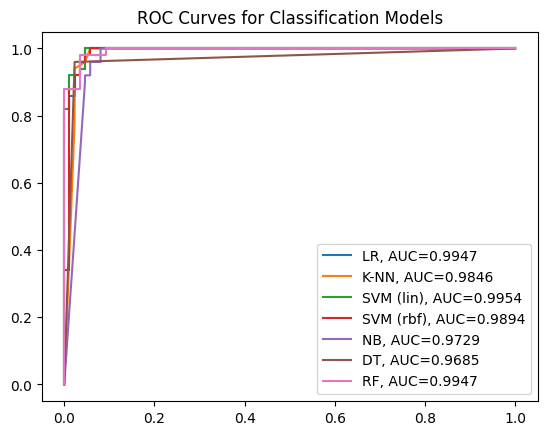

In [87]:
from sklearn import metrics

# set up plotting area
plt.figure(0).clf()

# 1.fit logistic regression model and plot ROC curve
model = logistic_R_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="LR, AUC="+str(auc) )

# 2.fit K-NN model and plot ROC curve
model = k_nn_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="K-NN, AUC="+str(auc) )

# 3.fit SVM (linear) model and plot ROC curve
model = sv_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="SVM (lin), AUC="+str(auc) )

# 4.fit SVM (rbf) (non-linear) model and plot ROC curve
model = sv_rbf_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="SVM (rbf), AUC="+str(auc) )

# 5.fit Naive Bayes and plot ROC curve
model = naive_bayes_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="NB, AUC="+str(auc) )

# 6.fit Decision Tree model and plot ROC curve
model = decision_tree_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="DT, AUC="+str(auc) )

# 7.fit Decision Tree model and plot ROC curve
model = random_F_classifier
y_pred = model.predict_proba(input_features_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(dv_test, y_pred)
auc = round(metrics.roc_auc_score(dv_test, y_pred), 4)
plt.plot(fpr, tpr, label="RF, AUC="+str(auc) )

#add legend
plt.legend()
plt.title("ROC Curves for Classification Models")

___